In [1]:
import numpy as np
import tensorflow as tf


In [11]:
num_classes=10

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [10]:
import os
os.listdir('/content/gdrive/My Drive')

['CandidateHallTicket (1).pdf',
 'Untitled document.gdoc',
 'agesheet.gsheet',
 'C1_10_copy.pdf',
 'Colab Notebooks',
 'LeafImage']

In [15]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/My Drive/LeafImage",
    shuffle=True,
    batch_size=12,
    image_size=(224, 224),
)

labels = dataset.class_names
labels

Found 108 files belonging to 10 classes.


['Ashoka',
 'Badipala',
 'CurryLeaf',
 'Parijhata',
 'Turmeric',
 'aloe',
 'bhrami',
 'castor',
 'giloy',
 'pomogranate']

In [16]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    break

(12, 224, 224, 3)
[5 5 9 2 6 2 6 6 2 3 9 7]


In [17]:
train_size = int(0.8 * len(dataset))
test_size = int(0.2 * len(dataset))
train_size, test_size

(7, 1)

In [18]:
def get_dataset_partisions_tf(ds, train_split=0.8, test_split=0.2, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * len(ds))
    test_size = int(test_split * len(ds))
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    val_ds = test_ds.skip(test_size)
    test_ds = test_ds.take(test_size)
    return train_ds, test_ds, val_ds

In [19]:
train_ds, test_ds, val_ds = get_dataset_partisions_tf(dataset)
len(train_ds), len(test_ds), len(val_ds)

(7, 1, 1)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(224, 224),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])


In [21]:
input_shape = (224, 224, 3)

In [22]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import cv2
from glob import glob
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# from patchify import patchify
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping
# import vit
import os
import numpy as np
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [23]:
from tensorflow.keras.applications import MobileNetV2

MobileNetV2_model = MobileNetV2(input_shape=input_shape, weights='imagenet', include_top=False)


for layer in MobileNetV2_model.layers:
    layer.trainable = True

x = GlobalAveragePooling2D()(MobileNetV2_model.output)
x = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=MobileNetV2_model.input, outputs=output)


9406464/9406464 [==============================] - 0s 0us/step


In [24]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [27]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=12,
    epochs=8
)

Epoch 1/8
7/7 [==============================] - 19s 3s/step - loss: 0.1912 - accuracy: 0.9643 - val_loss: 26.4936 - val_accuracy: 0.1667
Epoch 2/8
7/7 [==============================] - 19s 2s/step - loss: 0.4556 - accuracy: 0.9048 - val_loss: 22.2974 - val_accuracy: 0.0000e+00
Epoch 3/8
7/7 [==============================] - 22s 3s/step - loss: 0.2500 - accuracy: 0.9405 - val_loss: 17.2671 - val_accuracy: 0.1667
Epoch 4/8
7/7 [==============================] - 22s 3s/step - loss: 0.2340 - accuracy: 0.9762 - val_loss: 19.3023 - val_accuracy: 0.1667
Epoch 5/8
7/7 [==============================] - 22s 3s/step - loss: 0.2570 - accuracy: 0.9286 - val_loss: 22.3085 - val_accuracy: 0.0000e+00
Epoch 6/8
7/7 [==============================] - 20s 3s/step - loss: 0.1092 - accuracy: 0.9762 - val_loss: 19.9933 - val_accuracy: 0.0000e+00
Epoch 7/8
7/7 [==============================] - 27s 4s/step - loss: 0.0843 - accuracy: 0.9762 - val_loss: 24.0336 - val_accuracy: 0.1667
Epoch 8/8
7/7 [=======

In [28]:
model.evaluate(test_ds)

1/1 [==============================] - 3s 3s/step - loss: 8.9419 - accuracy: 0.4167


[8.941947937011719, 0.4166666567325592]

In [29]:
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    '/content/gdrive/My Drive/LeafImage/Ashoka/1.jpg', target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch


predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 1s/step
This image most likely belongs to Ashoka with a 73.11 percent confidence.


Correctly predicted


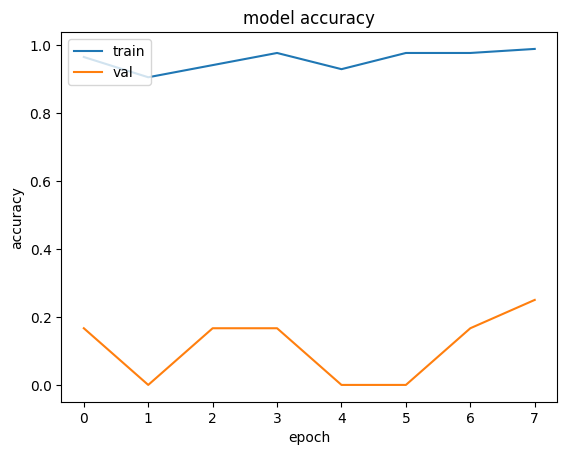

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
model.save('model_avg_20_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 9.4 MB/s eta 0:00:00


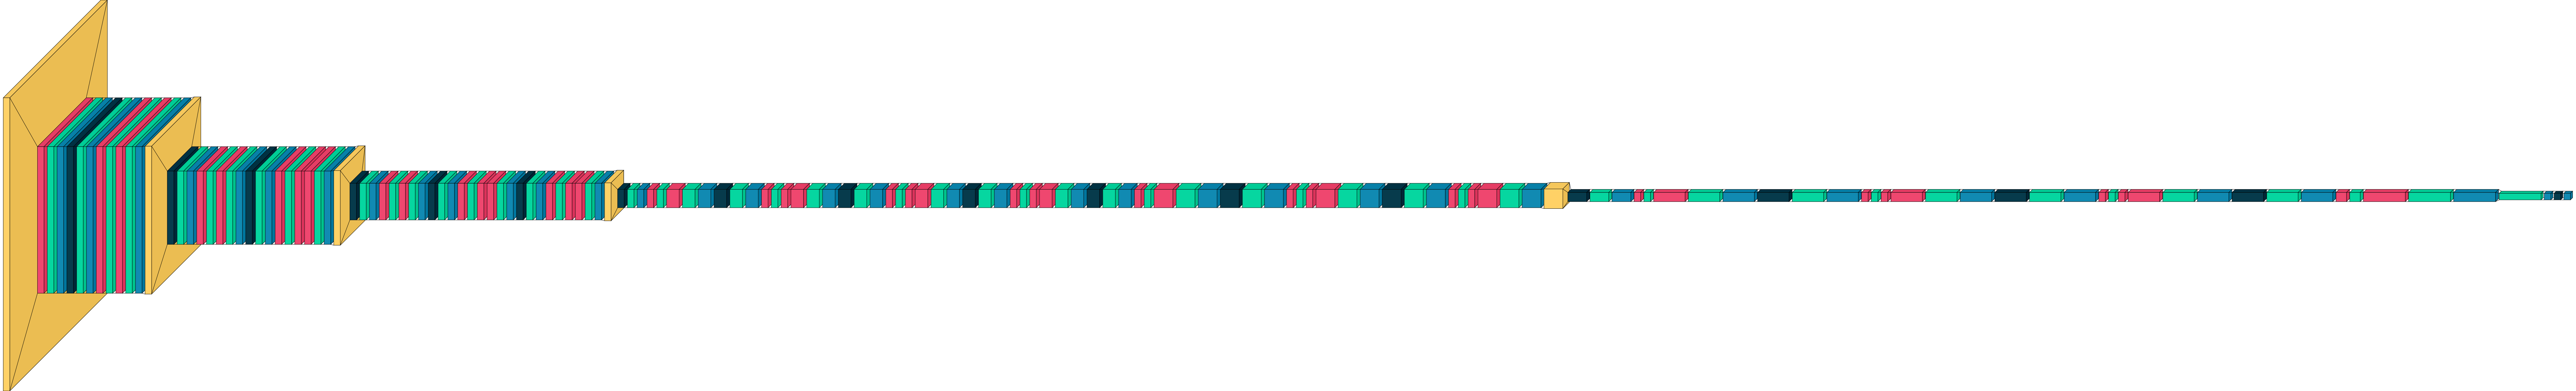

In [33]:
import visualkeras
visualkeras.layered_view(model)